In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def optimize_functions(functions, constraints, weights, with_bonus_intersections):
    x1, x2 = sp.symbols('x1 x2')

    def check_if_point_is_valid(point):
        for constraint in constraints:
            if constraint[1] == ">=":
                if constraint[0].subs(point) < 0:
                    return False
            elif constraint[1] == "<=":
                if constraint[0].subs(point) > 0:
                    return False
        return True

    # Find all intersections of the constraints
    bonus_intersections = [
        {sp.symbols('x1'): 10, sp.symbols('x2'): 10},
        {sp.symbols('x1'): 0, sp.symbols('x2'): 20},
        {sp.symbols('x1'): 10, sp.symbols('x2'): 0},
    ]

    xs_to_check = [20]

    for i in range(len(constraints)):
        for x in xs_to_check:
            x1_val = x
            x2_val = sp.solve(constraints[i][0].subs({x1: x}), x2)
            
            for val in x2_val:
                bonus_intersections.append({x1: x1_val, x2: val})
            
    intersections = []

    if with_bonus_intersections:
        intersections.extend(filter(lambda x: check_if_point_is_valid(x), bonus_intersections))

    for i in range(len(constraints)):
        for j in range(i + 1, len(constraints)):
            eq1 = constraints[i][0]
            eq2 = constraints[j][0]

            intersection = sp.solve([eq1, eq2], dict=True)

            for point in intersection:
                valid = check_if_point_is_valid(point)
                
                if valid:
                    intersections.append(point)
                else:
                    break

    # Plotting
    max_x1 = max([point[sp.symbols('x1')] for point in intersections])
    x1_vals = np.linspace(0, float(max_x1) + 5, 400)
    max_x2 = max([point[sp.symbols('x2')] for point in intersections])
    x2_vals = np.linspace(0, float(max_x2) + 5, 400)
    x1, x2 = np.meshgrid(x1_vals, x2_vals)

    plt.figure(figsize=(10, 8))

    # Plot constraints
    for constraint, sign in constraints:
        func = sp.lambdify((sp.symbols('x1'), sp.symbols('x2')), constraint, 'numpy')
        
        if sign == ">=":
            plt.contour(x1, x2, func(x1, x2), levels=[0], colors='r', linestyles='dashed')
        elif sign == "<=":
            plt.contour(x1, x2, func(x1, x2), levels=[0], colors='b', linestyles='dashed')
        
    # Plot intersections
    for point in intersections:
        plt.plot(point[sp.symbols('x1')], point[sp.symbols('x2')], 'ro')
        plt.text(point[sp.symbols('x1')], point[sp.symbols('x2')], f"({point[sp.symbols('x1')]}, {point[sp.symbols('x2')]})")

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Constraints and Intersections')
    plt.grid(True)
    plt.show()

    # Evaluate points for the given weights
    for w in weights: 
        print(f"Weight: {w}")
        points = []
        
        if len(intersections) == 0:
            print("No intersections found")
            continue
        
        for p in intersections:
            result_val = sum([w[i] * functions[i].subs(p) for i in range(len(functions))])
            
            # print(f"Point: {p}, Value: {result_val:.2f}")

            # for (i, f) in enumerate(functions):
            #     print(f"Function: {f}, Value: {w[i]:.2f} * {f.subs(p):.2f} = {w[i] * f.subs(p):.2f}")
            
            points.append((p, result_val))
            
        best_point = min(points, key=lambda x: x[1])
        print()
        print(f"Best point for weight {w}: {best_point[0]}, Value: {best_point[1]:.2f}")
        
        if best_point[0] in bonus_intersections:
            print("Probably suboptimal solution, and optimal solution is in the infinity")
        
        for (i, f) in enumerate(functions):
            print(f"Function: {f}, Value: {w[i]:.2f} * {f.subs(best_point[0]):.2f} = {w[i] * f.subs(best_point[0]):.2f}")
            
        print("---")

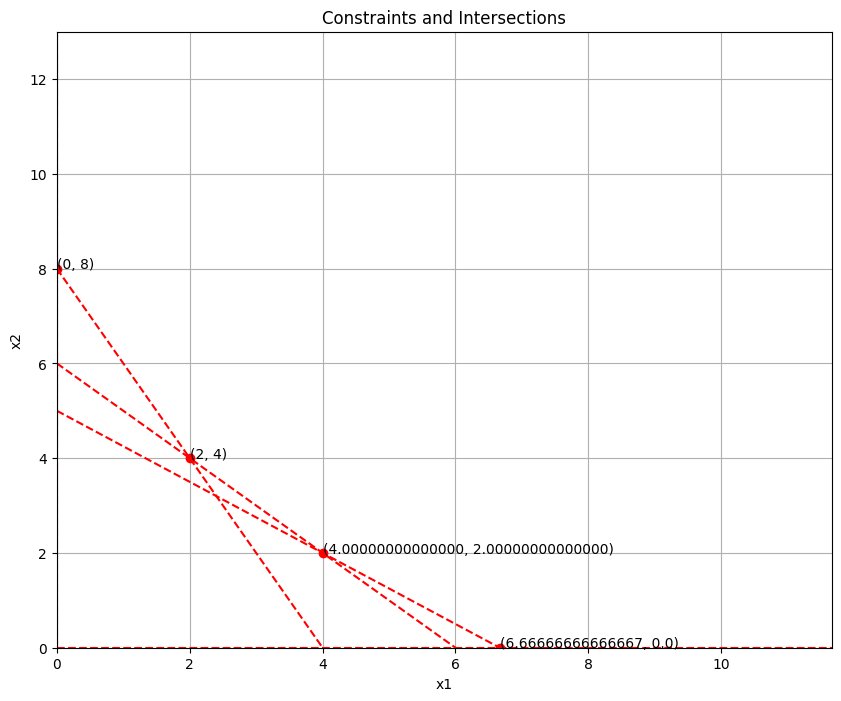

Weight: (0.5, 0.5)

Best point for weight (0.5, 0.5): {x1: 2, x2: 4}, Value: 9.00
Function: x1 + 2*x2, Value: 0.50 * 10.00 = 5.00
Function: 2*x1 + x2, Value: 0.50 * 8.00 = 4.00
---
Weight: (0.25, 0.75)

Best point for weight (0.25, 0.75): {x1: 2, x2: 4}, Value: 8.50
Function: x1 + 2*x2, Value: 0.25 * 10.00 = 2.50
Function: 2*x1 + x2, Value: 0.75 * 8.00 = 6.00
---
Weight: (0.7, 0.25)

Best point for weight (0.7, 0.25): {x1: 6.66666666666667, x2: 0.0}, Value: 8.00
Function: x1 + 2*x2, Value: 0.70 * 6.67 = 4.67
Function: 2*x1 + x2, Value: 0.25 * 13.33 = 3.33
---


In [9]:
functions = [
    sp.sympify("x1 + 2*x2"),
    sp.sympify("2*x1 + x2")
]

constraints = [
    [sp.sympify("x1 + x2 - 6"), ">="],
    [sp.sympify("2*x1 + x2 - 8"), ">="],
    [sp.sympify("0.75*x1 + x2 - 5"), ">="],
    [sp.sympify("x1"), ">="],
    [sp.sympify("x2"), ">="]
]

weights = [(0.5, 0.5), (0.25, 0.75), (0.7, 0.25)]

optimize_functions(functions, constraints, weights, with_bonus_intersections=False)

# Wizualizacja ograniczeń i rozwiązań

weights (0.5, 0.5): [0. 7.] min Value: 7.0
function 1: -7.0 function 2: 21.0

weights (0.25, 0.75): [1.42857143 2.71428571] min Value: 11.857142857142858
function 1: 1.5714285714285698 function 2: 15.285714285714286

weights (0.75, 0.25): [0. 7.] min Value: 0.0
function 1: -7.0 function 2: 21.0



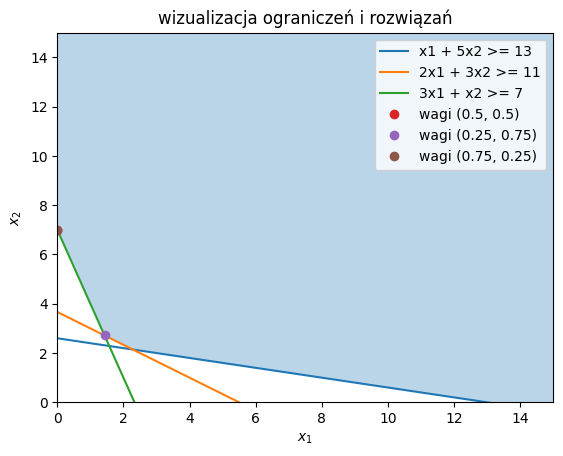

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def f1(x1, x2):
    return 3*x1 - x2

def f2(x1, x2):
    return 5*x1 + 3*x2

# ograniczenia
A = [
    [-1, -5],  # x1 + 5x2 >= 13 -> -x1 - 5x2 <= -13
    [-2, -3],  # 2x1 + 3x2 >= 11 -> -2x1 - 3x2 <= -11
    [-3, -1]   # 3x1 + x2 >= 7 -> -3x1 - x2 <= -7
]
b = [-13, -11, -7]

# ograniczenia brzegowe
x_bounds = (0, None)
y_bounds = (0, None)


weights = [(0.5, 0.5), (0.25, 0.75), (0.75, 0.25)]
cost_functions = [
    [4, 1],   # 0.5(3x1 - x2) + 0.5(5x1 + 3x2) -> 4x1 + x2
    [4.5, 2], # 0.25(3x1 - x2) + 0.75(5x1 + 3x2) -> 4.5x1 + 2x2
    [3.5, 0]  # 0.75(3x1 - x2) + 0.25(5x1 + 3x2) -> 3.5x1
]

solutions = []
for c in cost_functions:
    result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])
    solutions.append(result.x)

solutions = np.array(solutions)

# wyswietlanie wynikow
for i, (weight, sol) in enumerate(zip(weights, solutions)):
    print(f"weights {weight}: {sol} min Value: {cost_functions[i][0]*sol[0] + cost_functions[i][1]*sol[1]}")
    print(f"function 1: {f1(sol[0], sol[1])} function 2: {f2(sol[0], sol[1])}")
    print()

# ------------------- Wizualizacja -------------------


x = np.linspace(0, 15, 400)
y1 = (13 - x) / 5
y2 = (11 - 2*x) / 3
y3 = 7 - 3*x


plt.plot(x, y1, label='x1 + 5x2 >= 13')
plt.plot(x, y2, label='2x1 + 3x2 >= 11')
plt.plot(x, y3, label='3x1 + x2 >= 7')


plt.fill_between(x, np.maximum.reduce([y1, y2, y3]), 15, where=(x <= 15), alpha=0.3)


for i, sol in enumerate(solutions):
    plt.plot(sol[0], sol[1], 'o', label=f'wagi {weights[i]}')

#plt.plot(16/7, 15/7, 'o', label='(16/7, 15/7)')
#plt.plot(10/7, 19/7, 'o', label='(10/7, 19/7)')
#plt.plot(0, 7, 'o', label='(0, 7)')
#plt.plot(13, 0, 'o', label='(13, 0)')

plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('wizualizacja ograniczeń i rozwiązań')

plt.show()